The correlation of Annual mean exposure PM2.5 to Death rate (deaths per 100,000) is                                  Annual mean exposure (µg/m³)  \
Annual mean exposure (µg/m³)                         1.000000   
Death rate (deaths per 100,000)                      0.718941   

                                 Death rate (deaths per 100,000)  
Annual mean exposure (µg/m³)                            0.718941  
Death rate (deaths per 100,000)                         1.000000  


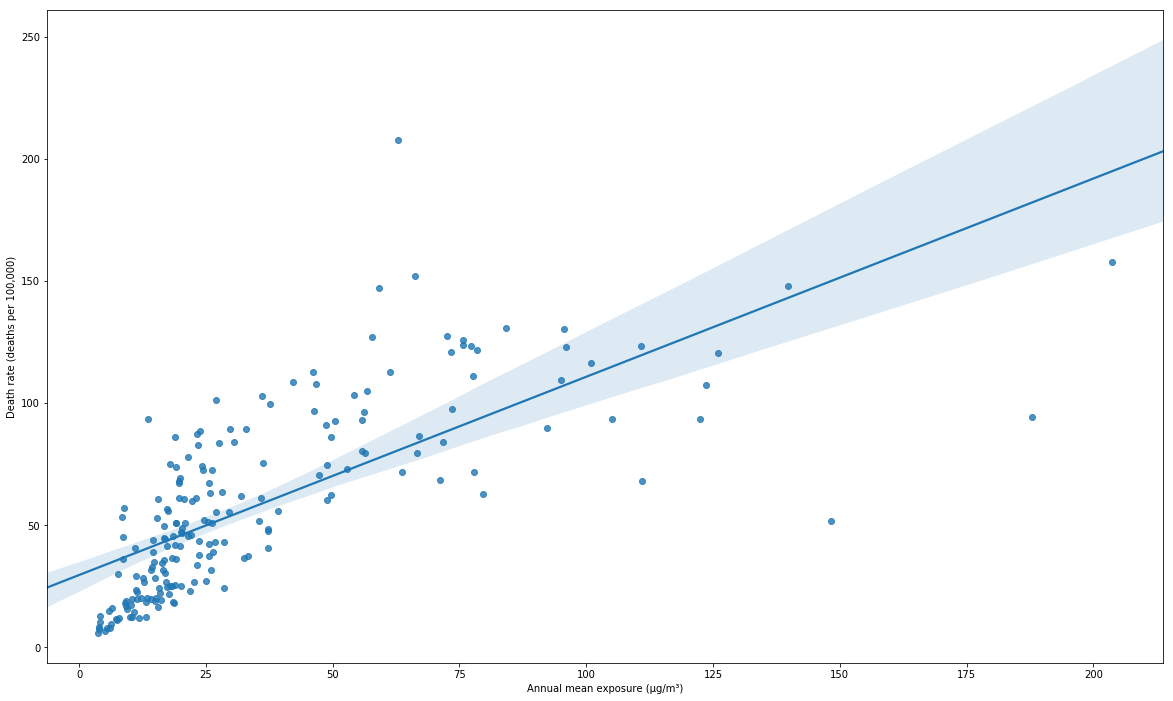

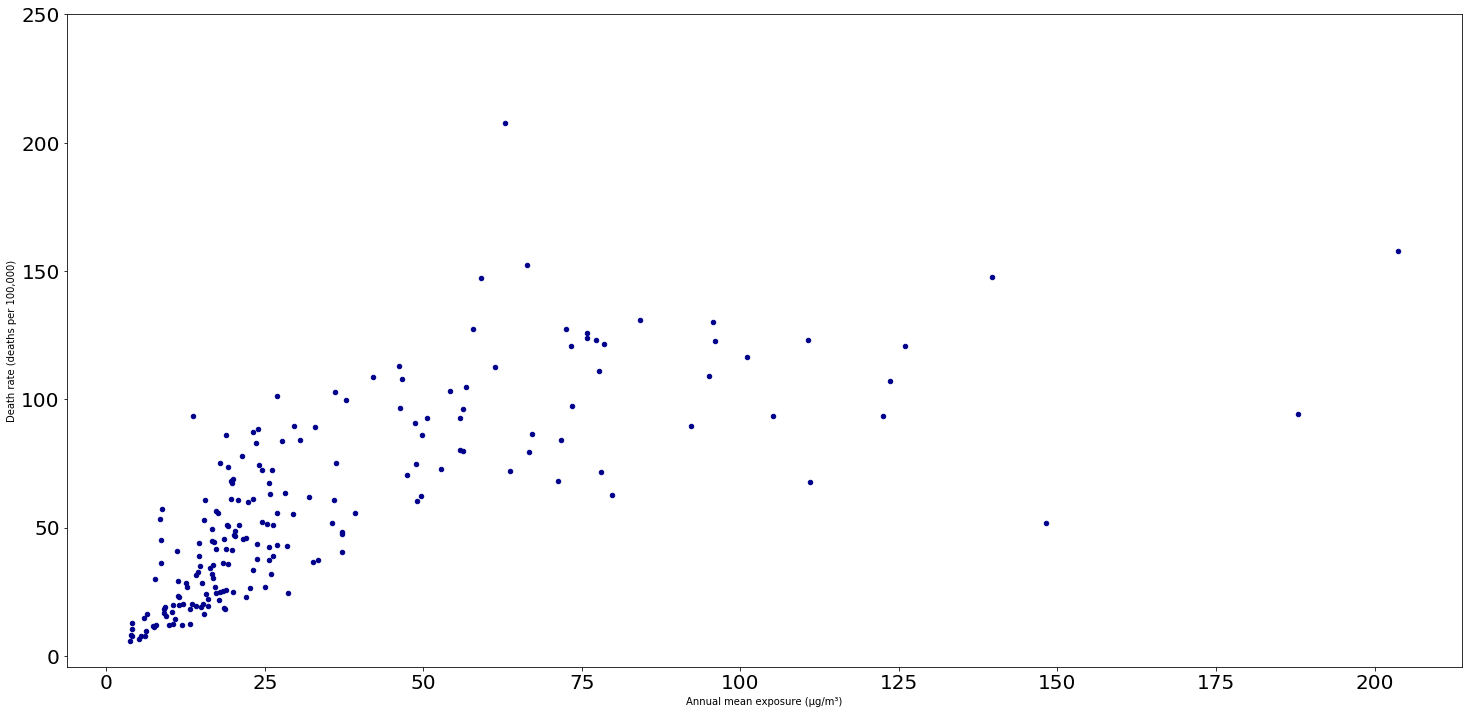

In [10]:
import pandas as pd
# Reading csv file
df2 = pd.read_csv('death-rates-from-ambient-particulate-air-pollution.csv')
#Cleaning of DeathRate file and shortlist to the 8 countries
df2 = df2.rename(columns = {'Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate) (deaths per 100,000)':'Death rate (deaths per 100,000)'}).rename(columns = {'Entity':'Country'})
df_16 = df2[df2['Year'].isin(['2016'])]
df16 = df_16.drop(columns = 'Code')

#Cleaning of Exposure file 
df = pd.read_csv('PM25-air-pollution.csv')
df = df.rename(columns = {'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)':'Annual mean exposure (µg/m³)'}).rename(columns = {'Entity':'Country'}).drop(columns = 'Code')
df = df[df['Year'].isin(['2016'])]
df = df.groupby('Country').mean().sort_values(by = ['Annual mean exposure (µg/m³)'], ascending=False) 
df['Country'] = df.index
df.index = range(len(df.index))
dfdf = df.drop(columns='Year')

#Merging the Exposure file to DeathRate file 
df_join = df16.merge(dfdf,how='right',on='Country')

df_j = df_join.dropna()


data = df_j[['Annual mean exposure (µg/m³)','Death rate (deaths per 100,000)']]
correlation = data.corr(method='pearson')

print(f'The correlation of Annual mean exposure PM2.5 to Death rate (deaths per 100,000) is {correlation}')

import seaborn as sns
ax = sns.regplot(x="Annual mean exposure (µg/m³)", y="Death rate (deaths per 100,000)", data=df_j)
ax.figure.set_size_inches(20, 12)

ax

a = df_j.plot.scatter(x='Annual mean exposure (µg/m³)',y='Death rate (deaths per 100,000)',c='DarkBlue', figsize=(25,12),fontsize=20, yticks = range(0,300,50))

a


In [ ]:
import seaborn as sns
ax = sns.regplot(x="Annual mean exposure (µg/m³)", y="Death rate (deaths per 100,000)", data=full_df1)

ax

a = full_df.plot.scatter(x='Annual mean exposure (µg/m³)',y='Death rate (deaths per 100,000)',c='DarkBlue')

a